# Classification 

Let's use the famous [iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)

<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="Iris Setosa" style="width: 200px;"/>
Iris Setosa
<img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg"  alt="Iris Versicolor" style="width: 200px;"/>
Iris Versicolor
<img src="https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg" alt="Iris Virginica" style="width: 200px;"/>
Iris Viginica

In [1]:
import seaborn
import pandas


iris_dataframe = pandas.read_csv("Iris.csv", dtype={"species": "category"})
iris_dataframe

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Let's add some columns that will:

1. make it easier to visualize this data
2. convert our categories to numeric values

In [2]:
color_map = {"setosa": "#e41a1c", "versicolor": "#377eb8", "virginica": "#4daf4a"}
label_map = {"setosa": 1, "versicolor": 2, "virginica": 3}
iris_dataframe["label"] = iris_dataframe.apply(lambda row: label_map[row["species"]], axis = 1)
iris_dataframe["plot_color"] = iris_dataframe.apply(lambda row: color_map[row["species"]], axis = 1)
iris_dataframe

,sepal_length,sepal_width,petal_length,petal_width,species,label,plot_color
0,5.1,3.5,1.4,0.2,setosa,1,#e41a1c
1,4.9,3.0,1.4,0.2,setosa,1,#e41a1c
2,4.7,3.2,1.3,0.2,setosa,1,#e41a1c
3,4.6,3.1,1.5,0.2,setosa,1,#e41a1c
4,5.0,3.6,1.4,0.2,setosa,1,#e41a1c
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3,#4daf4a
146,6.3,2.5,5.0,1.9,virginica,3,#4daf4a
147,6.5,3.0,5.2,2.0,virginica,3,#4daf4a
148,6.2,3.4,5.4,2.3,virginica,3,#4daf4a


# Visualizing the data

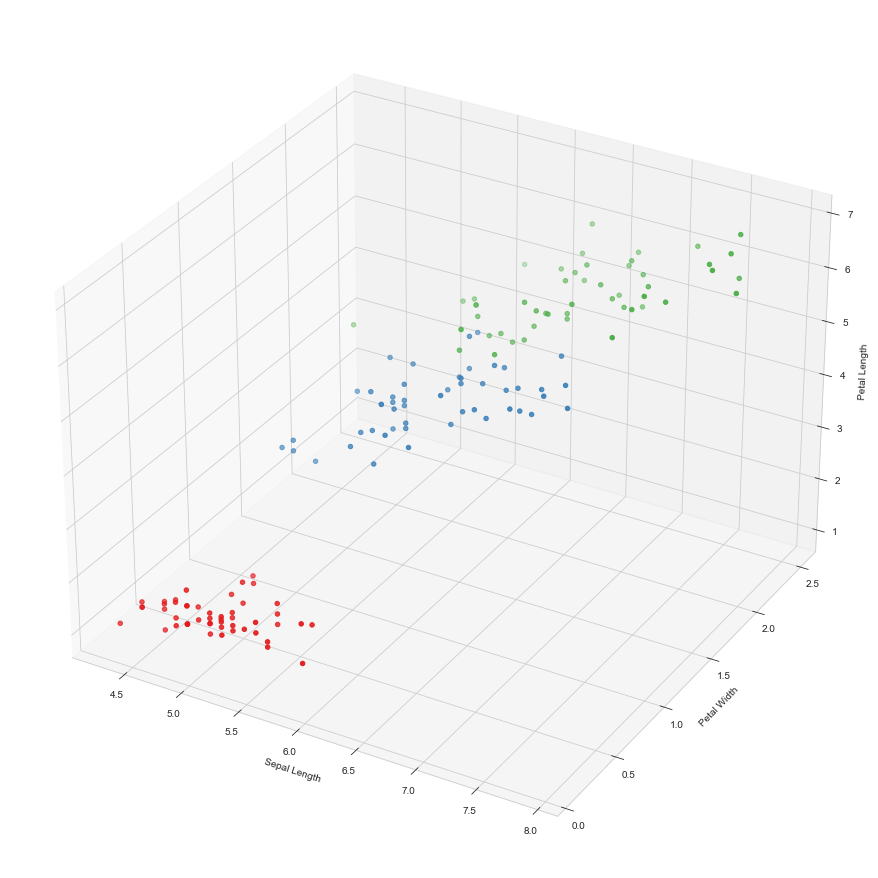

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

seaborn.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure(figsize=(12,12))

ax = Axes3D(fig) 

ax.scatter(iris_dataframe.sepal_length, iris_dataframe.petal_width, iris_dataframe.petal_length, c=iris_dataframe.plot_color, marker='o')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Petal Length')

plt.show()

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Reminder to James: Show what happens when we vary these.
feature_columns = ["sepal_length"] #"sepal_width"] #"petal_length"] #, "petal_width"]

# We do the same things for our features here that we did for linear regression!
features = iris_dataframe[feature_columns].values.reshape(-1, len(feature_columns))

labels = iris_dataframe["label"]

# Split our data into training and test data.
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=0)

# This also looks a _lot_ like how we did linear regression.
model = GaussianNB()
model.fit(features_train, labels_train)

# Let's see how we did.
predictions = model.predict(features_test)
species_map = {1: "setosa", 2: "versicolor", 3: "virginica"}
accuracy = sum([1.0 if pred == actual else 0.0 for pred, actual in zip(predictions, labels_test)]) / len(predictions) * 100
results = ["✅" if pred == actual else "" for pred, actual in zip(predictions, labels_test)]
print(f"Accuracy: {accuracy:.2f}%")
pandas.DataFrame({'Actual': labels_test, 'Predicted': predictions, 'Success?': results}).replace(species_map)

Accuracy: 66.67%


,Actual,Predicted,Success?
114,virginica,versicolor,
62,versicolor,versicolor,✅
33,setosa,versicolor,
107,virginica,virginica,✅
7,setosa,setosa,✅
100,virginica,virginica,✅
40,setosa,setosa,✅
86,versicolor,virginica,
76,versicolor,virginica,
71,versicolor,versicolor,✅


In [5]:
features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3